In [68]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [69]:
# Join entre Stress e Feedbacks


feedbacks = pd.read_csv("Feedbacks.csv", parse_dates=['created_date'])
stress = pd.read_csv("Stress.csv", parse_dates=['created_date'])

feedbacks_stress = pd.DataFrame()

feedbacks['estresse'] = np.zeros(len(feedbacks))

for i in range(len(stress)):
    if type(stress.iloc[i]['session_id']) == str:
        feeds_to_add = feedbacks[ feedbacks['session_id'] == stress.iloc[i]['session_id'] ]
        
    else:
        feeds_to_add = feedbacks[ feedbacks['email'] == stress.iloc[i]['email'] ]
      
    feeds_to_add['estresse'] = stress.loc[i, 'estresse']
    feedbacks_stress = feedbacks_stress.append(feeds_to_add)
    


In [70]:
# Join entre Stress e Feedbacks

feedbacks = pd.read_csv("Feedbacks.csv", parse_dates=['created_date'])
stress = pd.read_csv("Stress.csv", parse_dates=['created_date'])

stress_sid = stress[pd.notna(stress['session_id'])] # pega os que tem session_id preenchido
stress_email = stress[pd.notna(stress['email'])] # pega os que tem email preenchido
stress_email = stress_email[ ~stress_email['session_id'].isin(stress_sid['session_id']) ] # pega os que tem email sem session_id
stress_final = pd.concat([stress_sid, stress_email])

feedbacks_stress = pd.merge(feedbacks, stress_final, on=['session_id', 'email'], how='inner')

feedbacks_stress.tail()

,id_x,num_sessao_x,num_video_preferido,justificativa,created_date_x,published_date_x,incomodo,interesse1,interesse2,comment,email,english_x,session_id,versao,id_y,estresse,num_sessao_y,created_date_y,published_date_y,english_y
361,421,4,1,Por ter maior interesse e pelo fato do problem...,2018-07-31 15:11:26.329324,2018-07-31 15:11:26.341920,3,4,2,NaN,sidney@uniriotec.br,0,ytho9ulqqy6v9ebug2kbft86v7cny6dq,2,186,5,8,2018-07-31 15:04:39.786100,2018-07-31 15:04:39.798877,0
362,422,6,2,"Narrativa ficou mais fluida, sem interrupções,...",2018-07-31 15:13:45.145349,2018-07-31 15:13:45.158504,3,4,4,NaN,sidney@uniriotec.br,0,ytho9ulqqy6v9ebug2kbft86v7cny6dq,2,186,5,8,2018-07-31 15:04:39.786100,2018-07-31 15:04:39.798877,0
363,432,7,2,Não travou durante a execução,2018-08-01 22:56:36.658115,2018-08-01 22:56:36.672670,5,4,4,As falhas foram totalmente perceptíveis e incô...,NaN,0,j2bvy3czdrj3s65yftcrwpa8mg050iie,2,191,7,8,2018-08-01 22:54:07.856652,2018-08-01 22:54:07.870165,0
364,433,4,2,Não travou durante a execução,2018-08-01 22:58:54.995386,2018-08-01 22:58:55.009537,3,2,1,NaN,NaN,0,j2bvy3czdrj3s65yftcrwpa8mg050iie,2,191,7,8,2018-08-01 22:54:07.856652,2018-08-01 22:54:07.870165,0
365,434,1,0,NaN,2018-08-01 23:00:33.116931,2018-08-01 23:00:33.129230,1,0,0,NaN,NaN,0,j2bvy3czdrj3s65yftcrwpa8mg050iie,2,191,7,8,2018-08-01 22:54:07.856652,2018-08-01 22:54:07.870165,0


In [71]:
#normaliza os dados da versao 1 para range de 5
feedbacks_stress.loc[feedbacks_stress['versao'] == 1, ['incomodo', 'interesse1', 'interesse2'] ] //= 2


In [72]:
# inversao dos valores das sessoes que tem o primeiro video com QoS alta
feedbacks_stress = feedbacks_stress.reset_index(drop=True)

for i in range(len(feedbacks_stress.index)):
    if feedbacks_stress.loc[i, 'created_date_x'].month < 7:
        if feedbacks_stress.loc[i]['num_sessao_x'] in (1, 3, 6):
            feedbacks_stress.at[i, 'interesse1'], feedbacks_stress.at[i, 'interesse2'] = feedbacks_stress.at[i, 'interesse2'], feedbacks_stress.at[i, 'interesse1']
            if feedbacks_stress.at[i, 'num_video_preferido'] == 1:
                feedbacks_stress.at[i, 'num_video_preferido'] = 2
            else:
                feedbacks_stress.at[i, 'num_video_preferido'] = 1                   
    else:
        if feedbacks_stress.loc[i, 'num_sessao_x'] in (1, 5):
            feedbacks_stress.at[i, 'interesse1'], feedbacks_stress.at[i, 'interesse2'] = feedbacks_stress.at[i, 'interesse2'], feedbacks_stress.at[i, 'interesse1']
            
            if feedbacks_stress.at[i, 'num_video_preferido'] == 1:
                feedbacks_stress.at[i, 'num_video_preferido'] = 2
            else:
                feedbacks_stress.at[i, 'num_video_preferido'] = 1


In [95]:
#estatisticas basicas
feedbacks_stress.describe()

# print(feedbacks_stress.loc[7, ['incomodo', 'interesse1', 'interesse2', 'num_video_preferido', 'justificativa']])

,index,incomodo,interesse1,interesse2,estresse,dif_interesses
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,181.560440,3.667582,3.208791,2.582418,7.060440,1.225275
std,105.323634,1.275730,1.388790,1.546815,2.345308,1.278695
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,90.750000,3.000000,2.000000,1.000000,6.000000,0.000000
50%,181.500000,4.000000,4.000000,3.000000,8.000000,1.000000
75%,272.250000,5.000000,4.000000,4.000000,9.000000,2.000000
max,365.000000,5.000000,5.000000,5.000000,10.000000,5.000000


In [74]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

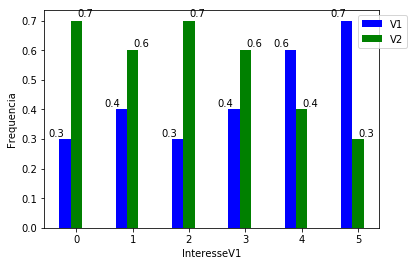

In [75]:
# grafico (interessev1 x preferencia/escolha usuario)

counts = feedbacks_stress.groupby(['interesse1','num_video_preferido'], as_index=False).size().unstack(fill_value=0).reset_index()
counts['V1_percent'] = round(counts[1]/(counts[1]+counts[2]), 1)
counts['V2_percent'] = round(counts[2]/(counts[1]+counts[2]), 1)

ax = plt.subplot()
b1 = ax.bar(counts['interesse1']-0.2, counts['V1_percent'],width=0.2,color='b',align='center')
b2 = ax.bar(counts['interesse1'], counts['V2_percent'],width=0.2,color='g',align='center')






leg = plt.legend((b1[0], b2[0]), ('V1', 'V2'), loc = 'upper right')

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = 0.1
bb.x0 += xOffset
bb.x1 += xOffset

leg.set_bbox_to_anchor(bb, transform = ax.transAxes)

plt.ylabel('Frequencia')
plt.xlabel('InteresseV1')


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(b1, "left")
autolabel(b2, "right")
plt.show()

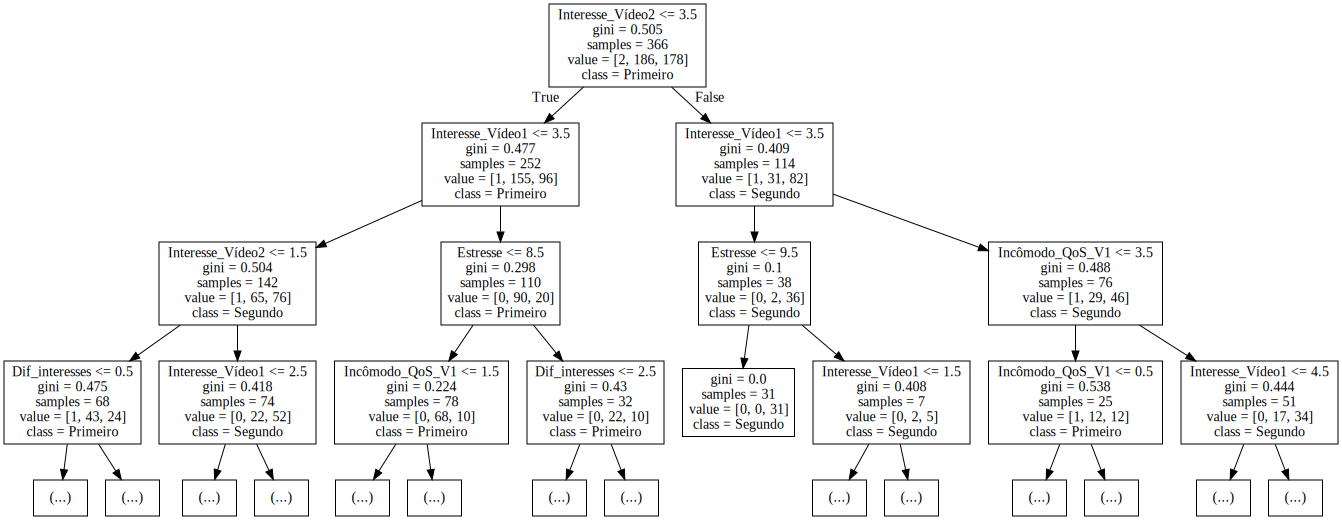

In [76]:
#Arvore de decisao

clf = tree.DecisionTreeClassifier()
feedbacks_stress['dif_interesses'] = abs(feedbacks_stress['interesse1'] - feedbacks_stress['interesse2'])
X = np.array([feedbacks_stress['incomodo'], feedbacks_stress['interesse1'], 
              feedbacks_stress['interesse2'], feedbacks_stress['dif_interesses'], feedbacks_stress['estresse']]).transpose()

Y = np.array(feedbacks_stress['num_video_preferido'])

clf.fit(X, Y)

 
feature_names=['Incômodo_QoS_V1', 'Interesse_Vídeo1', 'Interesse_Vídeo2', 'Dif_interesses', 'Estresse']
    
dot_data = tree.export_graphviz(clf, max_depth=3, feature_names=feature_names,
                                            class_names=['Nenhum', 'Primeiro', 'Segundo'],out_file=None) 
graph = graphviz.Source(dot_data)
# graph.render("feeds_1807_estresse_x")
graph


In [77]:
# prepara para aplicar os algoritmos de ML

# label = feedbacks_stress.num_video_preferido
# label = label.astype('int').reshape(-1,1)

feedbacks_stress = feedbacks_stress[feedbacks_stress.num_video_preferido != 0]
feedbacks_stress.reset_index(inplace=True)

feedbacks_stress_text = feedbacks_stress.drop(['id_x','id_y', 'email','num_sessao_x','num_sessao_y', 'created_date_x','created_date_y',
                                               'published_date_x', 'published_date_y', 'english_x','english_y', 'session_id','versao'], axis=1)
feedbacks_stress = feedbacks_stress_text.drop(['justificativa', 'comment'], axis=1)

feedbacks_stress.replace('NaN', np.nan, inplace=True)
feedbacks_stress.dropna(inplace=True)


label = feedbacks_stress.num_video_preferido
label = label.astype('int').reshape(-1,1)

feedbacks_stress.drop(['num_video_preferido'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [78]:
print(feedbacks_stress.shape)
print(label.shape)

(364, 6)
(364, 1)


In [225]:
# print(feedbacks_stress.shape)
# print(label.shape)
# print(feedbacks_stress_text.shape)

# missing_values=(feedbacks_stress.isnull().sum())/(feedbacks_stress.isnull().count())
# print(missing_values)

# missing_values=(feedbacks_stress.interesse1.value_counts('NaN').sum())/(feedbacks_stress.interesse1.value_counts('NaN').count())
# print(missing_values)

(364, 5)
(364, 1)
(197, 7)
incomodo          0.0
interesse1        0.0
interesse2        0.0
estresse          0.0
dif_interesses    0.0
dtype: float64
0.16666666666666666


In [ ]:
class Results:
    def __init__(self):
        pass
    nb, tree, sgd, lsvc, svc, kmeans, knn, rf, mlp, cross, test, index = [],[],[],[],[],[],[],[],[],[],[],[]

def getAverage(results_array):
    precisionAvg = 0
    accuracyAvg = 0
    size = len(results_array)
    for i in range (size):
        precisionAvg += results_array[i][2]
        accuracyAvg += results_array[i][3]
    return [precisionAvg/size, accuracyAvg/size]    
    
def run_algorithms(results, df_data, label):
    #Initialize test and train data
#     from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.model_selection import StratifiedKFold
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)
    X = df_data.iloc[:, :].values
    y = np.ravel(label)
#     x_train, x_test, y_train, y_test = train_test_split(df_data, label, test_size=0.3)
    
    
    for train_index, test_index in kf.split(df_data, y):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        results.index += [[train_index, test_index]]
        
        #Naive Bayes
        from sklearn.naive_bayes import MultinomialNB
        nb_clf = MultinomialNB().fit(x_train, y_train)
        nb_y_pred = nb_clf.predict(x_test)
        nb_cm = confusion_matrix(y_test, nb_y_pred)
        nb_p1 = precision_score(y_test, nb_y_pred)
        nb_p2 = precision_score(y_test, nb_y_pred, pos_label=2)
        nb_p = precision_score(y_test, nb_y_pred, average='weighted')
        nb_a = accuracy_score(y_test, nb_y_pred)
        nb_r = classification_report(y_test, nb_y_pred)
        results.nb += [[nb_p1, nb_p2, nb_p, nb_a, nb_cm, nb_r]]


        #Decision Trees
        from sklearn import tree
        tree_clf = tree.DecisionTreeClassifier().fit(x_train, y_train)
        tree_y_pred = tree_clf.predict(x_test)
        tree_cm = confusion_matrix(y_test, tree_y_pred)
        tree_p1 = precision_score(y_test, tree_y_pred)
        tree_p2 = precision_score(y_test, tree_y_pred, pos_label=2)
        tree_p = precision_score(y_test, tree_y_pred, average='weighted')
        tree_a = accuracy_score(y_test, tree_y_pred)
        tree_r = classification_report(y_test, tree_y_pred)
        results.tree += [[tree_p1, tree_p2, tree_p, tree_a, tree_cm, tree_r]]


        #Stochastic Gradient Descent
        from sklearn.linear_model import SGDClassifier
        sgd_clf = SGDClassifier(alpha=.000001, max_iter=50000, tol=1e-6).fit(x_train, y_train)
        sgd_y_pred = sgd_clf.predict(x_test)
        sgd_cm = confusion_matrix(y_test, sgd_y_pred)
        sgd_p1 = precision_score(y_test, sgd_y_pred)
        sgd_p2 = precision_score(y_test, sgd_y_pred, pos_label=2)
        sgd_p = precision_score(y_test, sgd_y_pred, average='weighted')
        sgd_a = accuracy_score(y_test, sgd_y_pred)
        sgd_r = classification_report(y_test, sgd_y_pred)
        results.sgd += [[sgd_p1, sgd_p2, sgd_p, sgd_a, sgd_cm, sgd_r]]


        #Linear SVC
        from sklearn.svm import LinearSVC
        lsvc_clf = LinearSVC(dual=False, max_iter=10000, tol=1e-6).fit(x_train, y_train)
        lsvc_y_pred = lsvc_clf.predict(x_test)
        lsvc_cm = confusion_matrix(y_test, lsvc_y_pred)
        lsvc_p1 = precision_score(y_test, lsvc_y_pred)
        lsvc_p2 = precision_score(y_test, lsvc_y_pred, pos_label=2)
        lsvc_p = precision_score(y_test, lsvc_y_pred, average='weighted')
        lsvc_a = accuracy_score(y_test, lsvc_y_pred)
        lsvc_r = classification_report(y_test,lsvc_y_pred)
        results.lsvc += [[lsvc_p1, lsvc_p2, lsvc_p, lsvc_a, lsvc_cm, lsvc_r]]


        #SVC
        from sklearn.svm import SVC
        svc_clf = SVC(cache_size=2000, probability = True).fit(x_train, y_train)
        svc_y_pred = svc_clf.predict(x_test)
        svc_cm = confusion_matrix(y_test, svc_y_pred)
        svc_p1 = precision_score(y_test, svc_y_pred)
        svc_p2 = precision_score(y_test, svc_y_pred, pos_label=2)
        svc_p = precision_score(y_test, svc_y_pred, average='weighted')
        svc_a = accuracy_score(y_test, svc_y_pred)
        svc_r = classification_report(y_test,svc_y_pred) 
        results.svc += [[svc_p1, svc_p2, svc_p, svc_a, svc_cm, svc_r]]

        #KNN Classifier
        from sklearn.neighbors import KNeighborsClassifier
        knn_clf = KNeighborsClassifier(n_neighbors=15).fit(x_test, y_test)
        knn_y_pred = knn_clf.predict(x_test)
        knn_cm = confusion_matrix(y_test, knn_y_pred)
        knn_p1 = precision_score(y_test, knn_y_pred)
        knn_p2 = precision_score(y_test, knn_y_pred, pos_label=2)
        knn_p = precision_score(y_test, knn_y_pred, average='weighted')
        knn_a = accuracy_score(y_test, knn_y_pred)
        knn_r = classification_report(y_test, knn_y_pred)
        results.knn += [[knn_p1, knn_p2, knn_p, knn_a, knn_cm, knn_r]]

        #Random Forest Algorithm
        from sklearn.ensemble import RandomForestClassifier 
        rf_clf = RandomForestClassifier(n_estimators=100, random_state=0).fit(x_train, y_train)
        rf_y_pred = rf_clf.predict(x_test)
        rf_cm = confusion_matrix(y_test, rf_y_pred)
        rf_p1 = precision_score(y_test, rf_y_pred)
        rf_p2 = precision_score(y_test, rf_y_pred, pos_label=2)
        rf_p = precision_score(y_test, rf_y_pred, average='weighted')
        rf_a = accuracy_score(y_test, rf_y_pred)
        rf_r = classification_report(y_test, rf_y_pred)
        results.rf += [[rf_p1, rf_p2, rf_p, rf_a, rf_cm, rf_r]]


        #Neural Network
        from sklearn.neural_network import MLPClassifier
        mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-6, hidden_layer_sizes=(15,15),
                                max_iter=1000, learning_rate='adaptive', ).fit(x_train, y_train)
        mlp_y_pred = mlp_clf.predict(x_test)
        mlp_cm = confusion_matrix(y_test, mlp_y_pred)
        mlp_p1 = precision_score(y_test, mlp_y_pred)
        mlp_p2 = precision_score(y_test, mlp_y_pred, pos_label=2)
        mlp_p = precision_score(y_test, mlp_y_pred, average='weighted')
        mlp_a = accuracy_score(y_test, mlp_y_pred)
        mlp_r = classification_report(y_test, mlp_y_pred)
        results.mlp += [[mlp_p1, mlp_p2, mlp_p, mlp_a, mlp_cm, mlp_r]]
        
        results.test += [[y_test, nb_y_pred, tree_y_pred, sgd_y_pred, lsvc_y_pred, svc_y_pred, knn_y_pred, rf_y_pred, mlp_y_pred]]
    
    results.cross = [getAverage(results.nb), getAverage(results.tree), getAverage(results.sgd), getAverage(results.lsvc),
                     getAverage(results.svc), getAverage(results.knn), getAverage(results.rf), getAverage(results.mlp)]
    return results

def print_results(results, text=""):
    #Write to file
    writer = pd.ExcelWriter('output'+str(text)+'.xlsx')
    column_label = ['Precision(1)', 'Precision(2)', 'Precision(Avg)', 'Accuracy', 'ConfusionMatrix', 'Summary']
    df_nb = pd.DataFrame(data=results.nb, columns = column_label)
    df_tree = pd.DataFrame(data=results.tree, columns = column_label)
    df_sgd = pd.DataFrame(data=results.sgd, columns = column_label)
    df_lsvc = pd.DataFrame(data=results.lsvc, columns = column_label)
    df_svc = pd.DataFrame(data=results.svc, columns = column_label)
    df_knn = pd.DataFrame(data=results.knn, columns = column_label)
    df_rf = pd.DataFrame(data=results.rf, columns = column_label)
    df_mlp = pd.DataFrame(data=results.mlp, columns = column_label)
    df_index = pd.DataFrame(data=results.index, columns = ['Train Index', 'Test Index'])
    df_cross = pd.DataFrame(data=results.cross, columns = ['Precision Average', 'Accuracy Average'])
    
    df_nb.to_excel(writer,'Naive Bayes')
    df_tree.to_excel(writer,'Decision Tree')
    df_sgd.to_excel(writer,'Stochastic Gradient Descent')
    df_lsvc.to_excel(writer,'Linear SVC')
    df_svc.to_excel(writer,'Support Vector Classification')
    df_knn.to_excel(writer,'K-Nearest Neighbors')
    df_rf.to_excel(writer,'Random Forest')
    df_mlp.to_excel(writer,'Multi Layer Perceptron')
    df_index.to_excel(writer, 'Cross Validation Index')
    df_cross.to_excel(writer, 'Cross Validation Average')

    writer.save()
    

In [ ]:
# #Main():
# import scikitplot as skplt
# container = Results()
# container = run_algorithms(container, feedbacks_stress, label)
    
# # for i in range(10):
# #     skplt.metrics.plot_confusion_matrix(container.test[i][0], container.test[i][1], normalize=True)
    
# print_results(container)

In [91]:
def searchParameters(X, y, classifier, parameters, scores =['accuracy'], text=''):
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import classification_report
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=0)

    writer = pd.ExcelWriter('parameters_'+str(text)+'.xlsx')
    summary = []
    for score in scores:
        clf = GridSearchCV(classifier, parameters, cv=10,
                           scoring= score, n_jobs=4)
        clf.fit(X_train, y_train)
        y_true, y_pred = y_test, clf.predict(X_test)

        summary += [[clf.best_params_, score, clf.best_score_, accuracy_score(y_true, y_pred), classification_report(y_true, y_pred)]]
        df_parameters = pd.DataFrame(data=summary, columns = ['Best Parameters', 'Metric', 'Score Value', 'Accuracy Test','Classification Report'])

    df_parameters.to_excel(writer, 'Grid Search Result')
    writer.save()


from sklearn.neural_network import MLPClassifier
# container = [{'activation':['relu'], 'solver':['lbfgs'], 'alpha':[0.00001, 0.00005, 0.00009, 0.0001, 0.0002, 0.0003] ,
#                      'learning_rate':['invscaling','constant'], 'learning_rate_init':[0.0005, 0.001, 0.002, 0.003, 0.004, 0.006],
#                    'hidden_layer_sizes':[5,8,9,10,11,12,15]}]

container = [{'activation':['relu'], 'solver':['lbfgs'], 'alpha': np.arange(0.0001, 0.001, 0.0001) ,
                     'learning_rate':['invscaling'], 'learning_rate_init': np.arange(0.001, 0.02, 0.001),
                   'hidden_layer_sizes':np.arange(8, 20, 1)}]

#RUN FUNCTION
# searchParameters(feedbacks_stress, np.ravel(label), MLPClassifier(max_iter=150, tol=0.00001), container, text='mlp')

In [92]:
#Use information from text

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['primeiro','segundo'])
tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', ngram_range=(1, 3), stop_words=stopwords, max_features=50)


text_data = feedbacks_stress_text.justificativa.fillna("")
features = tfidf.fit_transform(text_data).toarray()
features = pd.DataFrame(features)
data_tokenized = pd.concat([feedbacks_stress, features], axis=1, ignore_index=True)

# df_text = pd.DataFrame()
# df_text["text"] = feedbacks_stress_text['justificativa'].map(str) + ". " + feedbacks_stress_text['comment']
# df_text = df_text.fillna("")
# features = tfidf.fit_transform(df_text.text).toarray()
# features = pd.DataFrame(features)
# data_tokenized =  pd.concat([feedbacks_stress, features], axis=1, ignore_index=True)

from sklearn.neural_network import MLPClassifier
# container = [{'activation':['relu'], 'solver':['lbfgs'], 'alpha':[0.00001, 0.00005, 0.00009, 0.0001, 0.0002, 0.0003] ,
#                      'learning_rate':['invscaling','constant'], 'learning_rate_init':[0.0005, 0.001, 0.002, 0.003, 0.004, 0.006],
#                    'hidden_layer_sizes':[5,8,9,10,11,12,15]}]

container = [{'activation':['relu'], 'solver':['lbfgs'], 'alpha': np.arange(0.0001, 0.001, 0.0001) ,
                     'learning_rate':['invscaling'], 'learning_rate_init': np.arange(0.001, 0.02, 0.001),
                   'hidden_layer_sizes':np.arange(8, 20, 1)}]


#RUN FUNCTION
searchParameters(data_tokenized, np.ravel(label), MLPClassifier(max_iter=600, tol=0.00001), container, text='mlp')

In [86]:
# print_full(feedbacks_stress)
# print_full(feedbacks_stress)
print(data_tokenized.shape)
print(label.shape)
searchParameters(data_tokenized, np.ravel(label), MLPClassifier(max_iter=500, tol=0.00001), container, text='mlp')

(364, 56)
(364, 1)


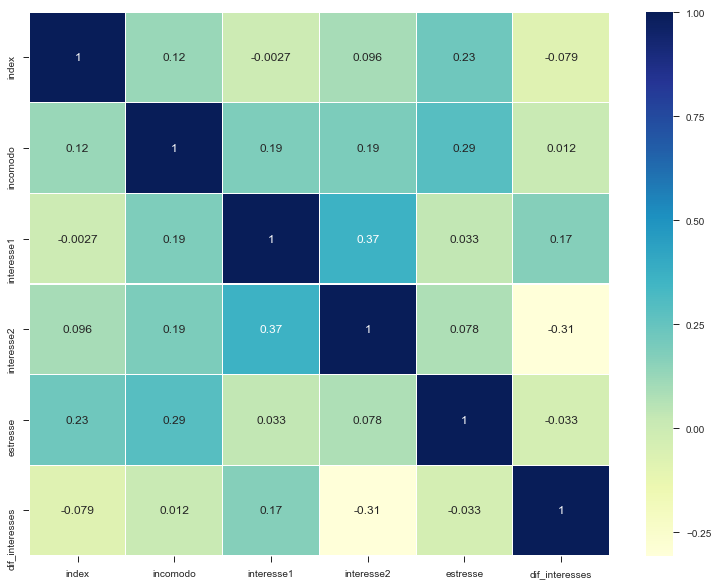

In [93]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
plt.figure(figsize=(13,10))
sns.heatmap(feedbacks_stress.corr(), linewidth=.1, cmap='YlGnBu', annot=True, vmax=1)

# feedbacks_stress.estresse.plot(kind='bar')
# feedbacks_stress[['interesse1','interesse2']].plot.hist(alpha=0.5)
# feedbacks_stress


# pd.set_option('display.max_rows', 1000)
# sns.pairplot(feedbacks_stress[['incomodo','interesse1','interesse2','estresse','dif_interesses']])
# feedbacks_stress

Ttest_relResult(statistic=32.270760741782546, pvalue=1.0953847263552963e-108)
Ttest_1sampResult(statistic=32.270760741782546, pvalue=1.0953847263552963e-108)


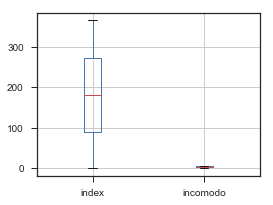

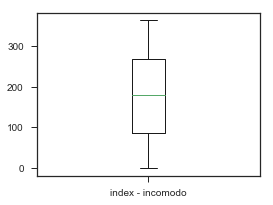

Ttest_relResult(statistic=32.30342204137144, pvalue=8.3400245290245045e-109)
Ttest_1sampResult(statistic=32.30342204137144, pvalue=8.3400245290245045e-109)


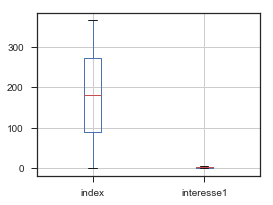

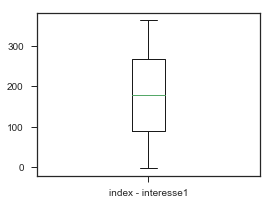

Ttest_relResult(statistic=32.463254091488075, pvalue=2.2009189695947377e-109)
Ttest_1sampResult(statistic=32.463254091488075, pvalue=2.2009189695947377e-109)


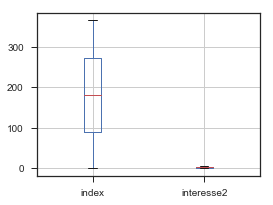

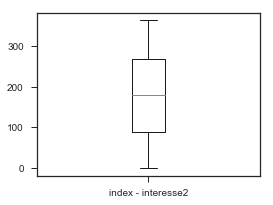

Ttest_relResult(statistic=31.76416034513454, pvalue=7.646548646099806e-107)
Ttest_1sampResult(statistic=31.76416034513454, pvalue=7.646548646099806e-107)


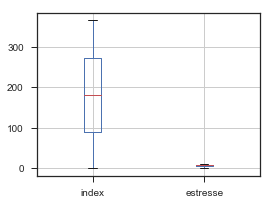

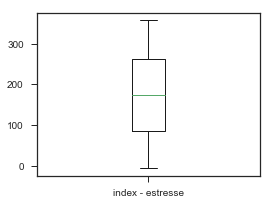

Ttest_relResult(statistic=32.63320207033816, pvalue=5.357356590839775e-110)
Ttest_1sampResult(statistic=32.63320207033816, pvalue=5.357356590839775e-110)


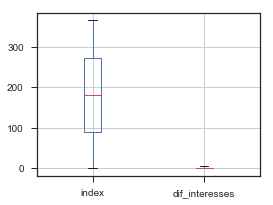

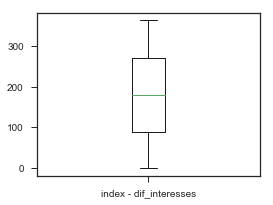

Ttest_relResult(statistic=5.145712096488407, pvalue=4.373202133435226e-07)
Ttest_1sampResult(statistic=5.145712096488407, pvalue=4.373202133435226e-07)


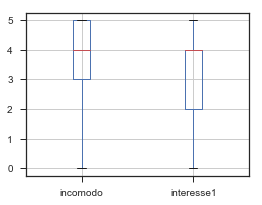

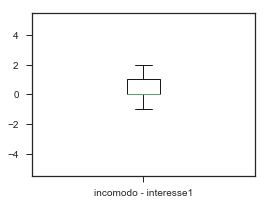

Ttest_relResult(statistic=11.461933140473297, pvalue=3.6131225007534194e-26)
Ttest_1sampResult(statistic=11.461933140473297, pvalue=3.6131225007534194e-26)


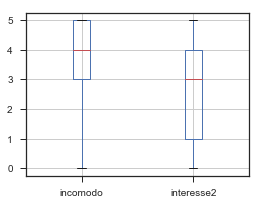

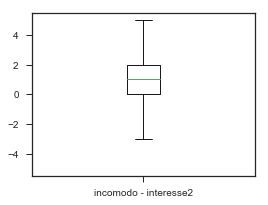

Ttest_relResult(statistic=-27.880077747268498, pvalue=3.0096631678492517e-92)
Ttest_1sampResult(statistic=-27.880077747268498, pvalue=3.0096631678492517e-92)


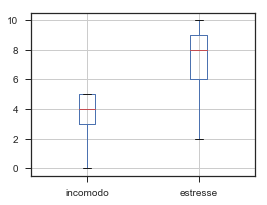

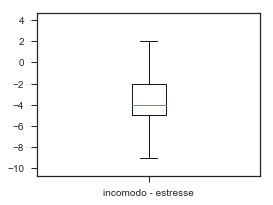

Ttest_relResult(statistic=25.956773951931734, pvalue=9.829620648175402e-85)
Ttest_1sampResult(statistic=25.956773951931734, pvalue=9.829620648175402e-85)


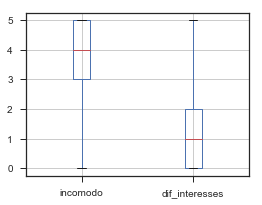

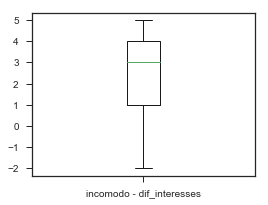

Ttest_relResult(statistic=7.210231423881598, pvalue=3.2697843763772742e-12)
Ttest_1sampResult(statistic=7.210231423881598, pvalue=3.2697843763772742e-12)


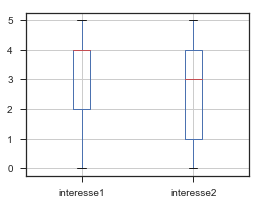

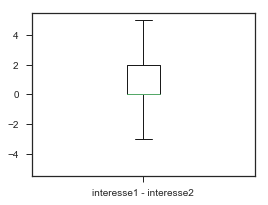

Ttest_relResult(statistic=-27.363189915025462, pvalue=3.0207804754393223e-90)
Ttest_1sampResult(statistic=-27.363189915025462, pvalue=3.0207804754393223e-90)


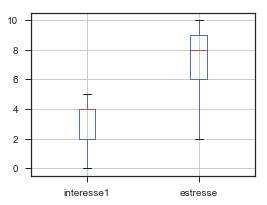

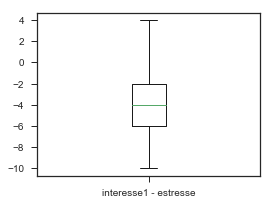

Ttest_relResult(statistic=22.022289130322395, pvalue=7.295974278965934e-69)
Ttest_1sampResult(statistic=22.022289130322395, pvalue=7.295974278965934e-69)


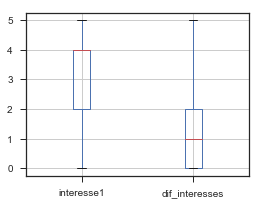

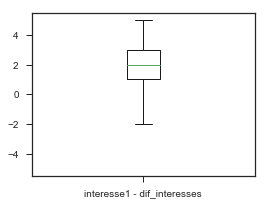

Ttest_relResult(statistic=-31.55601371808342, pvalue=4.416864564702692e-106)
Ttest_1sampResult(statistic=-31.55601371808342, pvalue=4.416864564702692e-106)


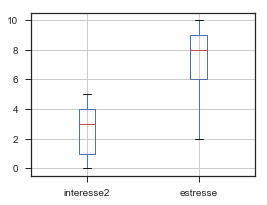

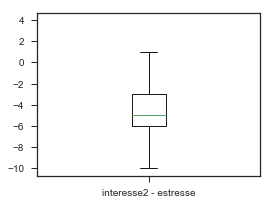

Ttest_relResult(statistic=11.312881757841016, pvalue=1.2737952015486046e-25)
Ttest_1sampResult(statistic=11.312881757841016, pvalue=1.2737952015486046e-25)


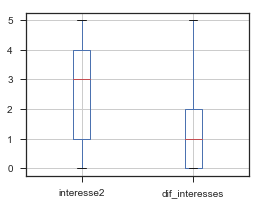

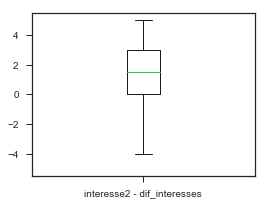

Ttest_relResult(statistic=41.1096844901038, pvalue=1.2243486268672814e-138)
Ttest_1sampResult(statistic=41.1096844901038, pvalue=1.2243486268672814e-138)


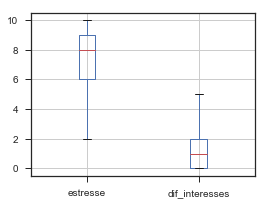

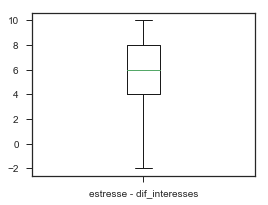

In [94]:
#Box-Plot
from scipy import stats
import matplotlib.pyplot as plt
data = feedbacks_stress

for i in data.columns:
    for j in data.columns[data.columns.get_indexer([i])[0]:]:
        if (i!=j):
            print(stats.ttest_rel(data[i], data[j]))
            plt.figure(figsize=(4, 3))
            data.boxplot(column=[i, j])
            
            print(stats.ttest_1samp(data[i] - data[j], 0))
            plt.figure(figsize=(4, 3))
            plt.boxplot(data[i] - data[j])
            plt.xticks((1, ), (i+' - '+j, ))
            plt.show()
            print ('====================================================================')

In [141]:
#Hypothesis Test 1
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
data = feedbacks_stress

#Calculate the T-test for the means of two independent samples of scores.
correlation = data.corr()
# t, p = stats.ttest_ind(data.interesse1,data.interesse2)
# r, p2 = stats.pearsonr(data.interesse1, data.interesse2)
# print("t = " + str(t))
# print("p = " + str(2*p))

print ('t-statistic = %6.8f pvalue = %6.10f' %  stats.ttest_ind(data.interesse1, data.interesse2))
print ('r-coeficient = %6.8f pvalue = %6.10f' %  stats.pearsonr(data.interesse1, data.interesse2))


print(correlation['interesse1']['interesse2'])

def t_statistic(r, n):
    from math import sqrt
    return r*sqrt(n-2)/sqrt(1-r*r)

print (t_statistic(0.36, 248))

t-statistic = 5.36858844 pvalue = 0.0000001223
r-coeficient = 0.36463421 pvalue = 0.0000000033
0.36463421441261246
6.052162958033122


In [93]:
## Import the packages
import numpy as np
from scipy import stats


## Define 2 random distributions
#Sample Size
N = 10
#Gaussian distributed data with mean = 2 and var = 1
a = np.random.randn(N) + 2
#Gaussian distributed data with with mean = 0 and var = 1
b = np.random.randn(N)

## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(2*p2))


t = 3.2044775578440583
p = 0.009827757934697985


,id_x,num_sessao_x,num_video_preferido,justificativa_x,created_date_x,published_date_x,incomodo,interesse1,interesse2,comment,...,id_y,estresse,num_sessao_y,justificativa_y,rebuff_feedback,recommend_feedback,created_date_y,published_date_y,english_y,dif_interesses
0,21,1,1,sempre melhor ver o Brasil ganhar,2018-02-27 14:20:59.846091,2018-02-27 14:20:59.846819,1,3,1,achei interessante essa comparação que vocês e...,...,25,7,8,NaN,NaN,NaN,2018-06-01 18:37:48.442930,2018-06-01 18:37:48.454924,0,2
1,102,6,1,"porque mesmo com as interrupções, achei mais v...",2018-06-01 18:45:15.018034,2018-06-01 18:45:15.029822,3,5,3,"as falhas foram perceptíveis, mas mesmo assim ...",...,25,7,8,NaN,NaN,NaN,2018-06-01 18:37:48.442930,2018-06-01 18:37:48.454924,0,2
2,103,2,1,é muito mais divertido,2018-06-01 18:48:35.779218,2018-06-01 18:48:35.788613,4,4,1,NaN,...,25,7,8,NaN,NaN,NaN,2018-06-01 18:37:48.442930,2018-06-01 18:37:48.454924,0,3
3,104,5,2,porque teve menos interrupções,2018-06-01 18:51:08.461539,2018-06-01 18:51:08.470969,3,4,4,NaN,...,25,7,8,NaN,NaN,NaN,2018-06-01 18:37:48.442930,2018-06-01 18:37:48.454924,0,0
4,28,1,2,Porque não teve interrupções.,2018-03-05 23:00:43.167848,2018-03-05 23:00:43.168835,5,2,2,Detestei o vídeo 2,...,1,10,8,"Um distirbio na qualidade na hora exata, pode ...",Com certeza esperar 5 segundos e assitir o víd...,Sim,2018-03-05 23:43:11.721917,2018-03-05 23:43:11.722535,0,0
5,29,2,1,"Pelo meu senso de humor, esse vídeo foi mais e...",2018-03-05 23:04:08.710863,2018-03-05 23:04:08.711772,0,0,0,As interrupções não me incomodaram tanto pois ...,...,1,10,8,"Um distirbio na qualidade na hora exata, pode ...",Com certeza esperar 5 segundos e assitir o víd...,Sim,2018-03-05 23:43:11.721917,2018-03-05 23:43:11.722535,0,0
6,30,3,2,Porque não teve interrupções e era mais engraç...,2018-03-05 23:09:57.627601,2018-03-05 23:09:57.629207,5,3,0,Meu senso de humor falou mais alto e eu não es...,...,1,10,8,"Um distirbio na qualidade na hora exata, pode ...",Com certeza esperar 5 segundos e assitir o víd...,Sim,2018-03-05 23:43:11.721917,2018-03-05 23:43:11.722535,0,3
7,31,4,1,Porque foi uma cena inusitada que me surpreendeu,2018-03-05 23:16:04.170965,2018-03-05 23:16:04.172780,0,0,0,Não me interesso pelo tópico de nenhum dos víd...,...,1,10,8,"Um distirbio na qualidade na hora exata, pode ...",Com certeza esperar 5 segundos e assitir o víd...,Sim,2018-03-05 23:43:11.721917,2018-03-05 23:43:11.722535,0,0
8,32,5,2,Achei legal assistir um vídeo de uma pessoa bo...,2018-03-05 23:27:32.690702,2018-03-05 23:27:32.691590,4,0,0,Comecei a reparar que vídeos aleatórios não me...,...,1,10,8,"Um distirbio na qualidade na hora exata, pode ...",Com certeza esperar 5 segundos e assitir o víd...,Sim,2018-03-05 23:43:11.721917,2018-03-05 23:43:11.722535,0,0
9,33,6,2,Porque me deu informações mais relevantes,2018-03-05 23:32:57.237638,2018-03-05 23:32:57.238310,5,2,2,"Teve uma interrupção no vídeo, num momento cru...",...,1,10,8,"Um distirbio na qualidade na hora exata, pode ...",Com certeza esperar 5 segundos e assitir o víd...,Sim,2018-03-05 23:43:11.721917,2018-03-05 23:43:11.722535,0,0
